Example with 2 parameters

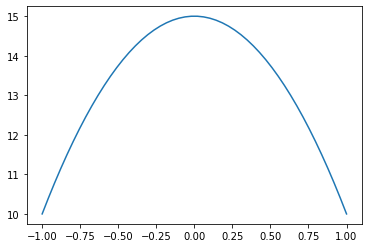

In [1]:
import numpy as np

# heat conduction in a bar with energy generation

def T(x,q,Ts): return q/2*(1-x**2)+Ts

L = 1
num_sample_points = 50
x = np.linspace(-L,L,num=num_sample_points)

import matplotlib.pyplot as plt

plt.plot(x,T(x,10,10))
plt.show()


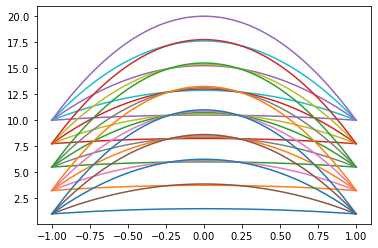

In [2]:
# generate snapshots
q = np.linspace(1,20,num=5)
k = np.linspace(1,10,num=5)

snapshot = np.zeros((num_sample_points ,q.shape[0]*k.shape[0]))
train_params = np.zeros((2,q.shape[0]*k.shape[0],))

zz = 0
for i in range(5):
    for j in range(5):
        snapshot[:,zz] = T(x,q[i],k[j])
        train_params[:,zz] = np.array([q[i],k[j]])
        zz += 1

for i in range(25):
    plt.plot(x,snapshot[:,i])
plt.show()



In [ ]:
import jax
import jax.numpy as jnp
import pod_rbf

jax.config.update('jax_default_device', jax.devices('cpu')[0])  # Change to 'gpu' or 'tpu' for accelerators

print(pod_rbf.__version__)

config = pod_rbf.TrainConfig(poly_degree=2)  # poly_degree: 0=none, 1=linear, 2=quadratic
result = pod_rbf.train(snapshot, train_params, config)
state = result.state
print("shape factor = {}".format(state.shape_factor))

test = pod_rbf.inference_single(state, jnp.array([8., 5.]))

diff = test - T(x, 8., 5)

plt.plot(np.abs(diff))
plt.show()

print(np.linalg.norm(diff, ord=2))